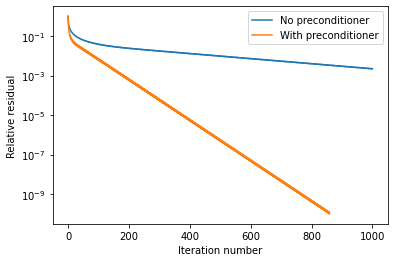

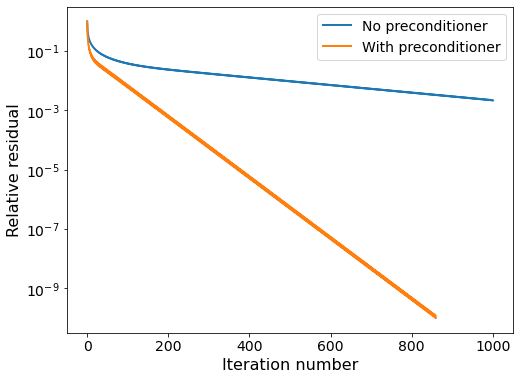

In [13]:
import numpy as np

def psd(A, b, P=None, max_iter=1000, tol=1e-10):
    """
    Preconditioned steepest descent method for solving linear system Ax = b
    with preconditioner P. Assumes A is symmetric positive definite.
    
    Parameters:
    A (np.ndarray): coefficient matrix
    b (np.ndarray): right-hand side vector
    P (np.ndarray): preconditioner matrix, default None (identity matrix)
    max_iter (int): maximum number of iterations, default 1000
    tol (float): tolerance for relative residual, default 1e-10
    
    Returns:
    x (np.ndarray): solution vector
    res (list): relative residual at each iteration
    """
    
    n = A.shape[0]
    x = np.zeros(n)
    r = b - A @ x
    if P is None:
        P = np.eye(n)
    z = np.linalg.solve(P, r)
    res = [np.linalg.norm(r) / np.linalg.norm(b)]
    
    for k in range(max_iter):
        alpha = (z @ r) / (z @ A @ z)
        x = x + alpha * z
        r = r - alpha * A @ z
        z = np.linalg.solve(P, r)
        res.append(np.linalg.norm(r) / np.linalg.norm(b))
        if res[-1] < tol:
            break
    
    return x, res


# Read in matrix A from file
A = np.loadtxt('A.dat', delimiter=',')
A = A.reshape((1600, 1600))

# Generate right-hand side vector b
xr = np.ones((1600, 1))
b = A @ xr


# Without preconditioner
x, res = psd(A, b.flatten())
with open('psd_noprecon.txt', 'w') as f:
    for k, r in enumerate(res):
        f.write(f'{k}\t{r}\n')

# With preconditioner
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
P = (D + L) @ np.linalg.inv(D) @ (D + U)
x, res = psd(A, b.flatten(), P=P)
with open('psd_precon.txt', 'w') as f:
    for k, r in enumerate(res):
        f.write(f'{k}\t{r}\n')

        
import matplotlib.pyplot as plt

# Load data from files
k_noprecon, res_noprecon = np.loadtxt('psd_noprecon.txt', unpack=True)
k_precon, res_precon = np.loadtxt('psd_precon.txt', unpack=True)

# Plot results
fig, ax = plt.subplots()
ax.semilogy(k_noprecon, res_noprecon, label='No preconditioner')
ax.semilogy(k_precon, res_precon, label='With preconditioner')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Relative residual')
ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

# Plot results
ax.semilogy(k_noprecon, res_noprecon, label='No preconditioner', linewidth=2)
ax.semilogy(k_precon, res_precon, label='With preconditioner', linewidth=2)

# Add legend and labels
ax.legend(fontsize=14)
ax.set_xlabel('Iteration number', fontsize=16)
ax.set_ylabel('Relative residual', fontsize=16)

# Increase tick label font size
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

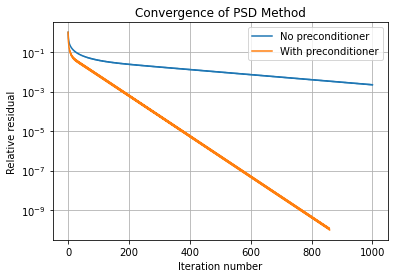

In [14]:
import matplotlib.pyplot as plt

# Load data from files
k_noprecon, res_noprecon = np.loadtxt('psd_noprecon.txt', unpack=True)
k_precon, res_precon = np.loadtxt('psd_precon.txt', unpack=True)

# Create figure and axes
fig, ax = plt.subplots()

# Plot results with logarithmic y-axis
ax.semilogy(k_noprecon, res_noprecon, label='No preconditioner')
ax.semilogy(k_precon, res_precon, label='With preconditioner')

# Set axis labels and title
ax.set_xlabel('Iteration number')
ax.set_ylabel('Relative residual')
ax.set_title('Convergence of PSD Method')

# Add legend and gridlines
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


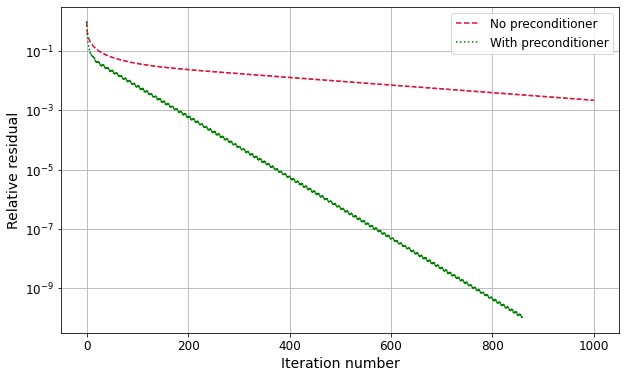

In [24]:
import matplotlib.pyplot as plt

# Load data from files
k_noprecon, res_noprecon = np.loadtxt('psd_noprecon.txt', unpack=True)
k_precon, res_precon = np.loadtxt('psd_precon.txt', unpack=True)




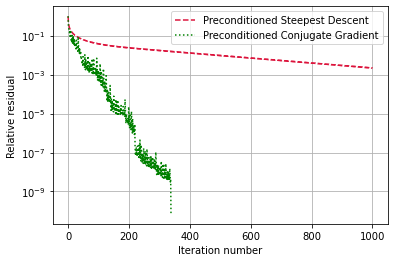

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def pcg(A, b, P=None, max_iter=1000, tol=1e-10):
    """
    Preconditioned conjugate gradient method for solving linear system Ax = b
    with preconditioner P. Assumes A is symmetric positive definite.
    
    Parameters:
    A (np.ndarray): coefficient matrix
    b (np.ndarray): right-hand side vector
    P (np.ndarray): preconditioner matrix, default None (identity matrix)
    max_iter (int): maximum number of iterations, default 1000
    tol (float): tolerance for relative residual, default 1e-10
    
    Returns:
    x (np.ndarray): solution vector
    res (list): relative residual at each iteration
    """
    n = A.shape[0]
    x = np.zeros(n)
    r = b - A @ x
    if P is None:
        P = np.eye(n)
    z = np.linalg.solve(P, r)
    p = z.copy()
    res = [np.linalg.norm(r) / np.linalg.norm(b)]
    for k in range(max_iter):
        Ap = A @ p
        alpha = (p @ r) / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        z = np.linalg.solve(P, r)
        beta = (p @ A @ z) / (p @ Ap)
        p = z + beta * p
        res.append(np.linalg.norm(r) / np.linalg.norm(b))
        if res[-1] < tol:
            break
    return x, res

# Read in matrix A from file
A = np.loadtxt('A.dat', delimiter=',')
A = A.reshape((1600, 1600))

# Generate right-hand side vector b
xr = np.ones((1600, 1))
b = A @ xr

# Without preconditioner
x, res_psd = psd(A, b.flatten())

# With preconditioner
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
P = (D + L) @ np.linalg.inv(D) @ (D + U)
x, res_pcg = pcg(A, b.flatten(), P=P)




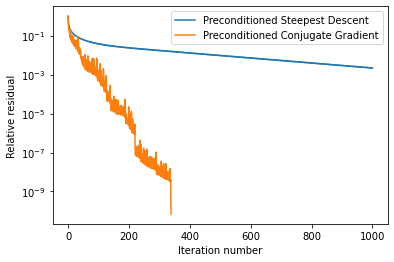

In [27]:
fig, ax = plt.subplots()
ax.semilogy(res_psd, label='Preconditioned Steepest Descent')
ax.semilogy(res_pcg, label='Preconditioned Conjugate Gradient')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Relative residual')
ax.legend()
plt.show()
